In [227]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [111]:
n_lens_files =  len(glob.glob('/Users/timholdsworth/code/lens-lab/lens-mit-papers/export-*.jsonl'))
doi_files = ['/Users/timholdsworth/code/lens-lab/lens-mit-papers/export-{}.jsonl'.format(i) for i in range(n_lens_files)]
print(len(doi_files))

20


In [127]:
def doi_count(df):
    count = 0
    for row in df['external_ids'].values.tolist():
        for id_dicts in row:
            if 'doi' in id_dicts.values():
                count += 1
    return count

In [132]:
def count_total_dois(doi_files):
    count = 0
    for file in doi_files:
        print('Counting DOIs for {}'.format(file))
        with open(file, 'r') as f:
            df = pd.read_json(f, lines=True)
            doi_ct = doi_count(df)
            count += doi_ct
        print('Total number of papers with DOIs is: {:,}'.format(count))
    return count

count = count_total_dois(doi_files)
count

Counting DOIs for /Users/timholdsworth/code/lens-lab/lens-mit-papers/export-0.jsonl
Number of papers with DOIs is: 9,165
Counting DOIs for /Users/timholdsworth/code/lens-lab/lens-mit-papers/export-1.jsonl
Number of papers with DOIs is: 17,677
Counting DOIs for /Users/timholdsworth/code/lens-lab/lens-mit-papers/export-2.jsonl
Number of papers with DOIs is: 26,576
Counting DOIs for /Users/timholdsworth/code/lens-lab/lens-mit-papers/export-3.jsonl
Number of papers with DOIs is: 35,141
Counting DOIs for /Users/timholdsworth/code/lens-lab/lens-mit-papers/export-4.jsonl
Number of papers with DOIs is: 43,924
Counting DOIs for /Users/timholdsworth/code/lens-lab/lens-mit-papers/export-5.jsonl
Number of papers with DOIs is: 52,380
Counting DOIs for /Users/timholdsworth/code/lens-lab/lens-mit-papers/export-6.jsonl
Number of papers with DOIs is: 61,349
Counting DOIs for /Users/timholdsworth/code/lens-lab/lens-mit-papers/export-7.jsonl
Number of papers with DOIs is: 70,197
Counting DOIs for /Users/

170542

In [192]:
df1 = pd.read_json(doi_files[10], lines=True)
df1.count()

abstract                           8857
author_count                      10000
authors                           10000
chemicals                          1118
conference                         1441
created                           10000
date_published                     9990
end_page                           8198
external_ids                      10000
fields_of_study                    9960
funding                            1500
issue                              6667
keywords                            337
languages                         10000
lens_id                           10000
mesh_terms                         1644
open_access                        2906
patent_citations                   1253
patent_citations_count             1253
publication_supplementary_type     1451
publication_type                   9585
references                         8514
references_count                   8514
scholarly_citations                8397
scholarly_citations_count          8397


In [180]:
len(df1.columns)

31

In [175]:
import numpy as np
df = pd.DataFrame({"Person":
                    ["John", "Myla", "Lewis", "John", "Myla"],
                    "Age": [np.nan, np.nan, np.nan, np.nan, np.nan],
                    "Single": [False, True, True, True, False]})
df.count()

Age       0
Person    5
Single    5
dtype: int64

In [240]:
def count_properties(doi_files):
    df1 = pd.read_json(doi_files[0], lines=True)
    counts = df1.count(axis=0)    
    
    for file in doi_files[4:]:
        print('Counting non-null properties for {}'.format(file))
        with open(file, 'r') as f:
            df = pd.read_json(f, lines=True)
            count = df.count(axis=0)
            print(len(count))
            counts = counts + count
            #counts.add(count, fill_value=0)
            print(counts)
        #print('Total number of non-null properties is: {}'.format(counts))
    return counts

prop_count_small = count_properties(doi_files)
type(count)

Counting non-null properties for /Users/timholdsworth/code/lens-lab/lens-mit-papers/export-4.jsonl
32
abstract                          17811
author_count                      20000
authors                           20000
chemicals                          2415
clinical_trials                       4
conference                         2978
created                           20000
date_published                    19968
end_page                          16817
external_ids                      20000
fields_of_study                   19924
funding                            3145
issue                             13391
keywords                            724
languages                         20000
lens_id                           20000
mesh_terms                         3520
open_access                        6220
patent_citations                   2754
patent_citations_count             2754
publication_supplementary_type     3080
publication_type                  19371
references        

31
abstract                          70992.0
author_count                      80000.0
authors                           80000.0
chemicals                          9262.0
clinical_trials                       NaN
conference                        11781.0
created                           80000.0
date_published                    79882.0
end_page                          66591.0
external_ids                      80000.0
fields_of_study                   79695.0
funding                           12020.0
issue                             53219.0
keywords                           2664.0
languages                         79999.0
lens_id                           80000.0
mesh_terms                        13424.0
open_access                       24114.0
patent_citations                  10444.0
patent_citations_count            10444.0
publication_supplementary_type    11921.0
publication_type                  76982.0
references                        68469.0
references_count               

31
abstract                          124123.0
author_count                      140000.0
authors                           140000.0
chemicals                          16222.0
clinical_trials                        NaN
conference                         20517.0
created                           140000.0
date_published                    139795.0
end_page                          116539.0
external_ids                      140000.0
fields_of_study                   139430.0
funding                            20936.0
issue                              93288.0
keywords                            4552.0
languages                         139998.0
lens_id                           140000.0
mesh_terms                         23486.0
open_access                        42099.0
patent_citations                   17986.0
patent_citations_count             17986.0
publication_supplementary_type     20767.0
publication_type                  134660.0
references                        119769.0
referenc

numpy.int64

In [196]:
# Because the header for clinical trials does not show up in every file
def count_clinical_trials(doi_files):
    count = 0
    for file in doi_files:
        print('Counting non-null properties for {}'.format(file))
        with open(file, 'r') as f:
            df = pd.read_json(f, lines=True)
            if 'clinical_trials' in df.columns:
                ct = df.count(axis=0)['clinical_trials']
                count += ct
        print(count)
    return count

count_clin_trials = count_clinical_trials(doi_files)

Counting non-null properties for /Users/timholdsworth/code/lens-lab/lens-mit-papers/export-0.jsonl
2
Counting non-null properties for /Users/timholdsworth/code/lens-lab/lens-mit-papers/export-1.jsonl
3
Counting non-null properties for /Users/timholdsworth/code/lens-lab/lens-mit-papers/export-2.jsonl
3
Counting non-null properties for /Users/timholdsworth/code/lens-lab/lens-mit-papers/export-3.jsonl
3
Counting non-null properties for /Users/timholdsworth/code/lens-lab/lens-mit-papers/export-4.jsonl
5
Counting non-null properties for /Users/timholdsworth/code/lens-lab/lens-mit-papers/export-5.jsonl
6
Counting non-null properties for /Users/timholdsworth/code/lens-lab/lens-mit-papers/export-6.jsonl
7
Counting non-null properties for /Users/timholdsworth/code/lens-lab/lens-mit-papers/export-7.jsonl
8
Counting non-null properties for /Users/timholdsworth/code/lens-lab/lens-mit-papers/export-8.jsonl
8
Counting non-null properties for /Users/timholdsworth/code/lens-lab/lens-mit-papers/export-

In [199]:
type(count_clin_trials)
type(int(count_clin_trials))


int

In [201]:
prop_count['clinical_trials'] = int(count_clin_trials)

In [217]:
prop_count.values.round(0).astype(int)

array([172171, 194506, 194506,  22456,     13,  28720, 194506, 194218,
       161403, 194506, 193701,  28975, 129087,   6249, 194503, 194506,
        32450,  58512,  24952,  24952,  28708, 186772, 166220, 166220,
       163814, 163814, 181947, 191097, 176323, 194505, 146544, 194506])

In [223]:
prop_count_int = prop_count.values.round(0).astype(int)
#type(prop_count.keys())
prop_count_int
p = pd.Series(prop_count_int, prop_count.keys())
p

abstract                          172171
author_count                      194506
authors                           194506
chemicals                          22456
clinical_trials                       13
conference                         28720
created                           194506
date_published                    194218
end_page                          161403
external_ids                      194506
fields_of_study                   193701
funding                            28975
issue                             129087
keywords                            6249
languages                         194503
lens_id                           194506
mesh_terms                         32450
open_access                        58512
patent_citations                   24952
patent_citations_count             24952
publication_supplementary_type     28708
publication_type                  186772
references                        166220
references_count                  166220
scholarly_citati

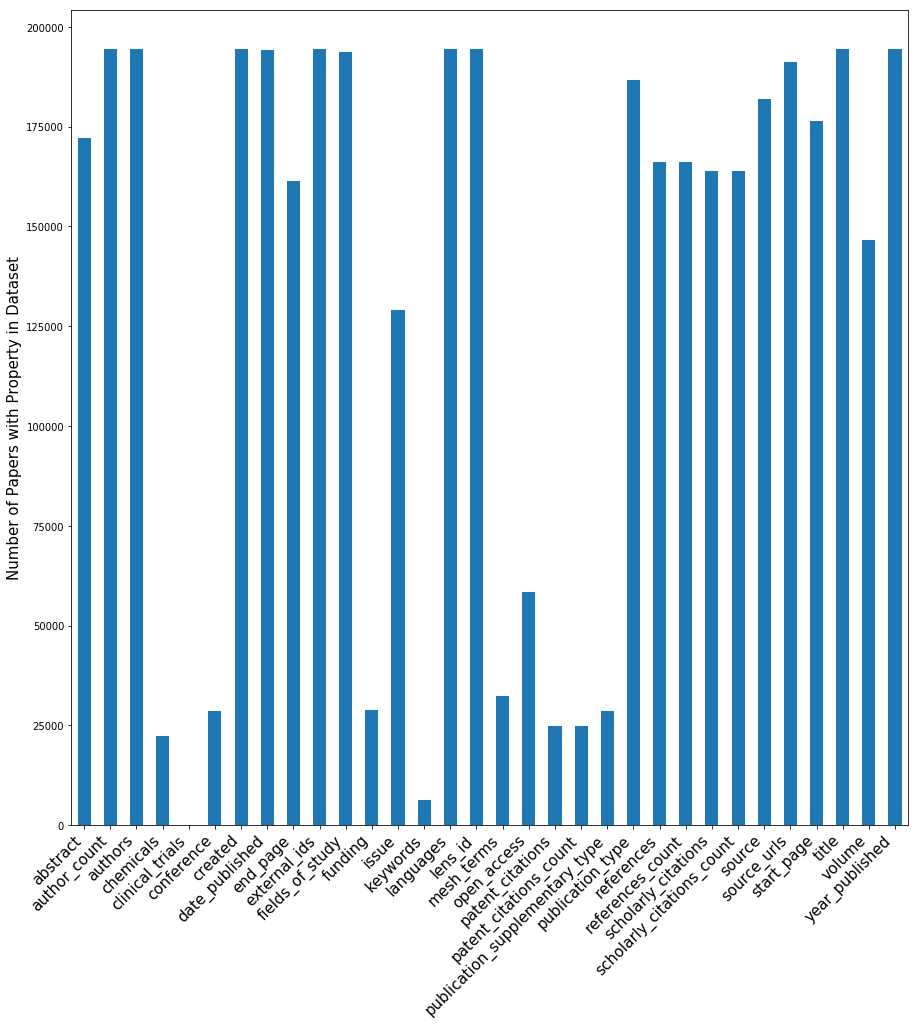

In [247]:
# Bar chart of the number of properties that are available
plt.figure(figsize=(15,15))
p.plot.bar()
plt.xticks(rotation=45, ha='right', fontsize=15)
plt.ylabel('Number of Papers with Property in Dataset', fontsize=15)
plt.savefig('properties-in-lens-dataset.png')
#plt.show()